In [1]:
import copy
import math


class InvalidMatrix(Exception): pass


def column_in_list(x):
    res = []
    for i in range(0, x.n):
        res.append(x._data[i][0])
    return res


def sign(x):
    if x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return 1


class Matrix:
    def __init__(self, n=0, m=0, l=None):
        if l is None:
            self._data = [[] for i in range(0, n)]
            self.n = n
            self.m = m
            for i in range(0, n):
                for j in range(0, m):
                    self._data[i].append(0)
        else:
            self._data = []
            self.n = len(l)
            self.m = len(l[0])
            for i in range(0, self.n):
                self._data.append(copy.copy(l[i]))

    def __str__(self):
        s = f''
        for i in range(0, self.n):
            if i != self.n - 1:
                s += str(self._data[i]) + '\n'
            else:
                s += str(self._data[i])
        return s

    def __add__(self, other):
        if self.n != other.n or self.m != other.m:
            raise InvalidMatrix
        m = Matrix(self.n, self.m)
        for i in range(0, self.n):
            for j in range(0, self.m):
                m._data[i][j] = self._data[i][j] + other._data[i][j]
        return m

    def __sub__(self, other):
        if self.n != other.n or self.m != other.m:
            raise InvalidMatrix
        m = Matrix(self.n, self.m)
        for i in range(0, self.n):
            for j in range(0, self.m):
                m._data[i][j] = self._data[i][j] - other._data[i][j]
        return m

    def __mul__(self, other):
        if isinstance(other, float) or isinstance(other, int):
            m = Matrix(n=self.n, m=self.m)
            for i in range(0, self.n):
                for j in range(0, self.m):
                    m._data[i][j] = self._data[i][j] * other
            return m
        if self.m != other.n:
            raise TypeError
        res = Matrix(n=self.n, m=other.m)
        for i in range(0, self.n):
            for j in range(0, other.m):
                for k in range(0, self.m):
                    res._data[i][j] += self._data[i][k] * other._data[k][j]
        return res

    def __truediv__(self, other):
        if isinstance(other, float) or isinstance(other, int):
            return self * (1 / other)
        else:
            raise TypeError

    def __eq__(self, other):
        if not isinstance(other, Matrix):
            raise TypeError
        if self.n != other.n or self.m != other.m:
            return False
        for i in range(0, self.n):
            for j in range(0, self.m):
                if self._data[i][j] != other._data[i][j]:
                    return False
        return True

    def identity(self, n):
        res = Matrix(n, n)
        for i in range(0, n):
            for j in range(0, n):
                if i == j:
                    res._data[i][j] = 1
                else:
                    res._data[i][j] = 0
        return res

    def tr(self):
        m = Matrix(self.m, self.n)
        for i in range(0, self.n):
            for j in range(0, self.m):
                m._data[j][i] = self._data[i][j]
        return m

    def find_max(self, j, k):
        max_elem = None
        index = None
        for i in range(k, self.n):
            if max_elem is None or abs(self._data[i][j]) > max_elem:
                max_elem = self._data[i][j]
                index = i
        return index

    def swap_line(self, i, j):
        self._data[i], self._data[j] = self._data[j], self._data[i]

    def swap_columns(self, k, j):
        for i in range(0, self.n):
            self._data[i][k], self._data[i][j] = self._data[i][j], self._data[i][k]

    def permutation(self, p):
        for elem in p:
            self.swap_line(elem[0], elem[1])
            self.swap_columns(elem[0], elem[1])

    def lu(self):
        if self.n != self.m:
            raise InvalidMatrix("матрица не квадратная\n")
        p = 0
        perm = []
        u = copy.deepcopy(self)
        l = Matrix(0, 0).identity(self.n)
        flag = False
        swap_i = 0
        swap_j = 0
        for j in range(0, u.m - 1):
            # print(u)
            index_max = u.find_max(j, j)
            if u._data[index_max][j] == 0:
                continue
            if index_max != j:
                p += 1
                perm.append((j, index_max))
                u.swap_line(j, index_max)
                swap_i = j
                swap_j = index_max
                l.swap_line(swap_i, swap_j)
                l.swap_columns(swap_i, swap_j)
            for i in range(j + 1, u.n):
                coefficient = u._data[i][j] / u._data[j][j]
                l._data[i][j] = coefficient
                for k in range(j, u.m):
                    u._data[i][k] -= u._data[j][k] * coefficient
        # l.permutation(perm)
        return l, u, p, perm

    def det(self):
        l, u, p, perm = self.lu()
        res = (-1) ** p
        for i in range(0, u.n):
            res *= u._data[i][i]
        return round(res, 3)

    def is_tridiagonal(self):
        if self.n != self.m:
            raise InvalidMatrix("матрица не квадратная\n")
        for i in range(0, self.n):
            for j in range(0, i - 1):
                if self._data[i][j] != 0:
                    return False
            for j in range(i + 2, self.m):
                if self._data[i][j] != 0:
                    return False
        return True

    def solve(self, l, u, b):
        z = [0 for i in range(0, l.n)]
        z[0] = b[0]
        for i in range(1, l.n):
            coef = 0
            for j in range(0, i):
                coef += l._data[i][j] * z[j]
            z[i] = b[i] - coef

        x = [0 for i in range(0, u.n)]
        x[u.n - 1] = z[u.n - 1] / u._data[u.n - 1][u.m - 1]
        del i
        for i in range(u.n - 2, -1, -1):
            coef = 0
            for j in range(i + 1, u.m):
                coef += u._data[i][j] * x[j]
            x[i] = (z[i] - coef) / u._data[i][i]
        return x

    # метод LU
    def solve_SLAU(self, d):
        b = copy.copy(d)
        l, u, p, perm = self.lu()
        for elem in perm:
            b[elem[0]], b[elem[1]] = b[elem[1]], b[elem[0]]
        return self.solve(l, u, b)

    def invers(self):
        if self.n != self.m:
            raise InvalidMatrix("матрица не квадратная\n")
        l, u, p, perm = self.lu()
        e = Matrix(0, 0).identity(self.n)
        e = e.tr()
        answ = []
        for j in range(0, self.m):
            b = e._data[j]
            for elem in perm:
                b[elem[0]], b[elem[1]] = b[elem[1]], b[elem[0]]
            answ.append(self.solve(l, u, b))
        answ = Matrix(l=answ)
        return answ.tr()

    # метод прогонки
    def tridiag_solve_SLAU(self, d):
        if not self.is_tridiagonal():
            raise InvalidMatrix("матрица не трехдиагональня\n")
        p = [0 for i in range(0, self.n)]
        q = [0 for i in range(0, self.n)]
        p[0] = -self._data[0][1] / self._data[0][0]
        q[0] = d[0] / self._data[0][0]
        for i in range(1, self.n - 1):
            p[i] = -self._data[i][i + 1] / (self._data[i][i] + self._data[i][i - 1] * p[i - 1])
            q[i] = (d[i] - self._data[i][i - 1] * q[i - 1]) / (self._data[i][i] + self._data[i][i - 1] * p[i - 1])
        q[self.n - 1] = (d[self.n - 1] - self._data[self.n - 1][self.n - 2] * q[self.n - 2]) / (
                self._data[self.n - 1][self.n - 1] + self._data[self.n - 1][self.n - 2] * p[self.n - 2])
        x = [0 for i in range(0, self.n)]
        x[self.n - 1] = q[self.n - 1]
        for i in range(self.n - 2, -1, -1):
            x[i] = p[i] * x[i + 1] + q[i]
        return x

    # вычисление нормы матрицы
    def calc_norm_matrix(self):
        res = 0
        for row in self._data:
            for elem in row:
                res += elem ** 2
        return math.sqrt(res)

    def calc_norm_vector(self, b):
        res = 0
        for elem in b:
            res += elem ** 2
        return math.sqrt(res)

    def is_end_iter_method(self, norm_a, x2, x1, e):
        # a = self.calc_norm_matrix()
        x = [0 for i in range(0, len(x1))]
        for i in range(0, len(x1)):
            x[i] = x2[i] - x1[i]
        norm_x = self.calc_norm_vector(x)
        ek = (norm_a / (1 - norm_a)) * norm_x
        if (norm_a < 1):
            if ek <= e:
                return False
            else:
                return True
        else:
            if norm_x <= e:
                return False
            else:
                return True

    """    if ek <= e or norm_x <= e:
            return False
        else:
            return True"""

    def Jacobi_iter_solve_SLAU(self, d, e=0.01):
        if self.n != self.m:
            raise InvalidMatrix("матрица не квадратная\n")
        for i in range(0, self.n):
            if self._data[i][i] == 0:
                for k in range(i + 1, self.n):
                    if self._data[k][i] != 0:
                        self.swap_line(i, k)
        for i in range(0, self.n):
            if self._data[i][i] == 0:
                raise InvalidMatrix("невозможно составить диагональ из ненулевых элементовя\n")
        b = [0 for i in range(0, len(d))]
        for i in range(0, self.n):
            b[i] = d[i] / self._data[i][i]
        a = Matrix(self.n, self.m)
        for i in range(0, self.n):
            for j in range(0, self.m):
                if i != j:
                    a._data[i][j] = -self._data[i][j] / self._data[i][i]
        beta = Matrix(n=len(b), m=1)
        for i in range(0, len(b)):
            beta._data[i][0] = b[i]
        x = copy.deepcopy(beta)
        norm_matrix_a = a.calc_norm_matrix()
        cur_x = beta + a * x
        count_iter = 0
        while self.is_end_iter_method(norm_matrix_a, column_in_list(cur_x), column_in_list(x), e):
            x = cur_x
            cur_x = beta + a * x
            count_iter += 1
        return cur_x, count_iter

    def Seidel_iter_solve_SLAU(self, d, e=0.01):
        if self.n != self.m:
            raise InvalidMatrix("матрица не квадратная\n")
        for i in range(0, self.n):
            if self._data[i][i] == 0:
                for k in range(i + 1, self.n):
                    if self._data[k][i] != 0:
                        self.swap_line(i, k)
        for i in range(0, self.n):
            if self._data[i][i] == 0:
                raise InvalidMatrix("невозможно составить диагональ из ненулевых элементовя\n")
        b = [0 for i in range(0, len(d))]
        for i in range(0, self.n):
            b[i] = d[i] / self._data[i][i]
        a = Matrix(self.n, self.m)
        for i in range(0, self.n):
            for j in range(0, self.m):
                if i != j:
                    a._data[i][j] = -self._data[i][j] / self._data[i][i]
        beta = Matrix(n=len(b), m=1)
        for i in range(0, len(b)):
            beta._data[i][0] = b[i]
        cur_x = b
        norm_matrix_a = a.calc_norm_matrix()
        count_iter = 0
        first_iter = True
        while first_iter or self.is_end_iter_method(norm_matrix_a, cur_x, x, e):
            count_iter += 1
            first_iter = False
            x = cur_x
            cur_x = [0 for i in range(0, len(x))]
            for i in range(0, len(x)):
                cur_x[i] += b[i]
                for j in range(0, len(x)):
                    if j < i:
                        cur_x[i] += a._data[i][j] * cur_x[j]
                    else:
                        cur_x[i] += a._data[i][j] * x[j]

        tmp = list()
        for elem in cur_x:
            l = []
            l.append(elem)
            tmp.append(l)
        cur_x = Matrix(l=tmp)
        return cur_x, count_iter

    def max_elem_in_matrix(self):
        flag = True
        max = None
        m_i, m_j = 0, 0
        for i in range(0, self.n):
            for j in range(0, self.m):
                if flag or abs(self._data[i][j]) >= max:
                    if j >= i:
                        continue
                    flag = False
                    max = abs(self._data[i][j])
                    m_i = i
                    m_j = j
        return m_i, m_j

    def is_end_rotation_method(self, a, e):
        res = 0
        for i in range(0, a.n):
            for j in range(0, a.m):
                if i == j:
                    continue
                res += a._data[i][j] ** 2
        res = math.sqrt(res)
        if res > e:
            return True
        else:
            return False

    def get_rotation_matrix(self, a):
        u = a.identity(a.n)
        max_i, max_j = a.max_elem_in_matrix()
        y = None
        if a._data[max_i][max_i] == a._data[max_j][max_j]:
            y = math.pi / 2
        else:
            y = 0.5 * math.atan(2 * a._data[max_i][max_j] / (a._data[max_i][max_i] - a._data[max_j][max_j]))
        u._data[max_i][max_i] = math.cos(y)
        u._data[max_i][max_j] = -math.sin(y)
        u._data[max_j][max_i] = math.sin(y)
        u._data[max_j][max_j] = math.cos(y)
        return u

    def rotation_method(self, e=0.01):
        if self != self.tr():
            raise InvalidMatrix("матрица не симметрическая\n")
        iter_count = 0
        a = copy.deepcopy(self)
        mul_u = a.identity(a.n)
        while self.is_end_rotation_method(a, e):
            u = self.get_rotation_matrix(a)
            mul_u *= u
            a = (u.tr() * a) * u
            iter_count += 1
        return a, mul_u, iter_count

    def _QR(self):
        q = self.identity(self.n)
        a = copy.deepcopy(self)
        for j in range(0, a.m - 1):
            b = []
            for i in range(j, a.n):
                b.append(a._data[i][j])
            v = Matrix(a.n, 1)
            v._data[j][0] = a._data[j][j] + sign(a._data[j][j]) * self.calc_norm_vector(b)
            for i in range(j + 1, a.n):
                v._data[i][0] = a._data[i][j]
            h = a.identity(a.n) - (v * v.tr()) * 2 / (v.tr() * v)._data[0][0]
            q *= h
            a = h * a
        return q, a

    def _is_end_QR(self, a, e=0.01):
        flag = True
        for j in range(0, a.m - 1):
            b = []
            for i in range(j + 1, a.n):
                b.append(a._data[i][j])
            e1 = self.calc_norm_vector(b)
            b = []
            for i in range(j + 2, a.n):
                b.append(a._data[i][j])
            e2 = self.calc_norm_vector(b)
            if e1 > e:
                return True
            elif e2 > e:
                return True
            else:
                return False

    def complex_x_QR(self, a, b, c, d):
        di = (a + d) ** 2 - 4 * (a * d - b * c)
        return (a + d - di ** (1 / 2)) / 2,  (a + d + di ** (1 / 2)) / 2

    def QR_method(self, e=0.01):
        if self.n != self.m:
            raise InvalidMatrix("матрица не квадратная\n")
        a = self
        while self._is_end_QR(a, e):
            q, r = a._QR()
            a = r * q
        h = []
        flag = False
        for i in range(0, a.n):
            if flag:
                flag = False
                continue
            if i != a.n - 1 and abs(a._data[i + 1][i]) > 0.01:
                h.append(self.complex_x_QR(a._data[i][i], a._data[i][i + 1], a._data[i + 1][i], a._data[i + 1][i + 1]))
                flag = True
            else:
                h.append(a._data[i][i])
        return a, h

In [36]:
import math
import matplotlib.pyplot as plt


def u_begin(t):
    return math.cos(2* t)

def u_end(t):
    return 0

def u_x0(x):
    return math.exp(-x) * math.cos(x)

def solve_f(x, t):
    a = math.cos(x)
    return math.exp(-x) * math.cos(x) * math.cos(2 * t)

class HyperboloidSolver:
    """ 6 вариант """
    def __init__(self, r, h, t_interval, x_interval):
        self.t_beg = t_interval[0]
        self.t_end = t_interval[1]
        self.x_beg = x_interval[0]
        self.x_end = x_interval[1]
        self.r = r
        self.h = h
        self.K = int((t_interval[1] - t_interval[0]) / r)
        self.N = int((x_interval[1] - x_interval[0]) / h)
        self.u = [[0 for column in range(self.N + 1)] for row in range(self.K + 1)]

    def explicit(self):
        sigma = self.r ** 2 / (self.h ** 2)
        for j in range(self.N + 1):
            self.u[0][j] = u_x0(self.x_beg + self.h * j)
        for k in range(self.K + 1):
            self.u[k][0] = u_begin(self.t_beg + self.r * k)
            self.u[k][self.N] = u_end(self.t_beg + self.r * k)
        for j in range(1, self.N):
            self.u[1][j] = u_x0(self.x_beg + self.h * j)
        for k in range(2, self.K + 1):
            for j in range(1, self.N):
                self.u[k][j] = sigma * (self.u[k - 1][j + 1] - 2 * self.u[k - 1][j] + self.u[k - 1][j - 1]) \
                               + sigma * 2 * self.h * (self.u[k - 1][j + 1] - self.u[k - 1][j]) \
                               - sigma * 2 * (self.h ** 2) * self.u[k - 1][j] + 2 * self.u[k - 1][j] - self.u[k - 2][j]
    
    def implicit(self):
        sigma = self.r ** 2 / (self.h ** 2)
        for j in range(self.N + 1):
            self.u[0][j] = u_x0(self.x_beg + self.h * j)
        for k in range(self.K + 1):
            self.u[k][0] = u_begin(self.t_beg + self.r * k)
            self.u[k][self.N] = u_end(self.t_beg + self.r * k)
        for j in range(1, self.N):
            self.u[1][j] = u_x0(self.x_beg + self.h * j)
        for k in range(2, self.K + 1):
            m = [[0 for j in range(0, self.N + 1)] for i in range(0, self.N + 1)]
            d = [0 for j in range(0, self.N + 1)]
            m[0][0] = -(2 - 2 * self.h)
            m[0][1] = 0
            d[0] = -(2 - 2 * self.h) * u_begin(self.r * k)
            m[self.N][self.N - 1] = 0
            m[self.N][self.N] = 2 + 2 * self.h
            for j in range(1, self.N):
                m[j][j - 1] = (sigma / 2) * (-2 + 2 * self.h)
                m[j][j] = (1 + 2 * sigma + 2 * self.r ** 2)
                m[j][j + 1] = (sigma / 2) * (-2 - 2 * self.h)
                d[j] = 2 * self.u[k - 1][j] - self.u[k - 2][j]
            matrix = Matrix(l=m)
            row = matrix.tridiag_solve_SLAU(d)
            self.u[k] = row
    
    def x_const_plot(self):
        fig = plt.figure(figsize=(10, 80))
        for j in range(self.N + 1):
            ax = fig.add_subplot(self.N + 1, 1, j + 1)
            ax.set(ylim=[-1, 1], xlim=[0, math.pi / 2])
            ax.set_title(f"const x = {self.h * j}")
            t = [self.r * k for k in range(self.K + 1)]
            u_t = [self.u[k][j] for k in range(self.K + 1)]
            plt.plot(t, u_t)
            answ = [solve_f(j * self.h, t_elem) for t_elem in t]
            ax.plot(t, answ, color= "black")
        plt.show()
        
    def t_const_plot(self, interval):
        fig = plt.figure(figsize=(10, 10 * (interval[1] - interval[0] + 1)))
        for k in range(interval[0], interval[1] + 1):
            ax = fig.add_subplot(interval[1] - interval[0] + 1, 1, k + 1 - interval[0])
            ax.set(ylim=[-1, 1], xlim=[0, math.pi / 2])
            ax.set_title(f"const t = {self.r * k}")
            x = [self.h * j for j in range(self.N + 1)]
            u_x = self.u[k]
            plt.plot(x, u_x)
            answ = [solve_f(x_elem, self.r * k) for x_elem in x]
            ax.plot(x, answ, color="black")
        plt.show()
        
    def get_error(self):
        error = 0
        k = self.K // 2
        x = [self.h * j for j in range(self.N + 1)]
        u_x = self.u[k]
        answ = [solve_f(x_elem, self.r * k) for x_elem in x]
        for i in range(self.N):
            error += abs(answ[i] - u_x[i]) ** 2
        return math.sqrt(error) / (self.N + 1)
        
        
                                           

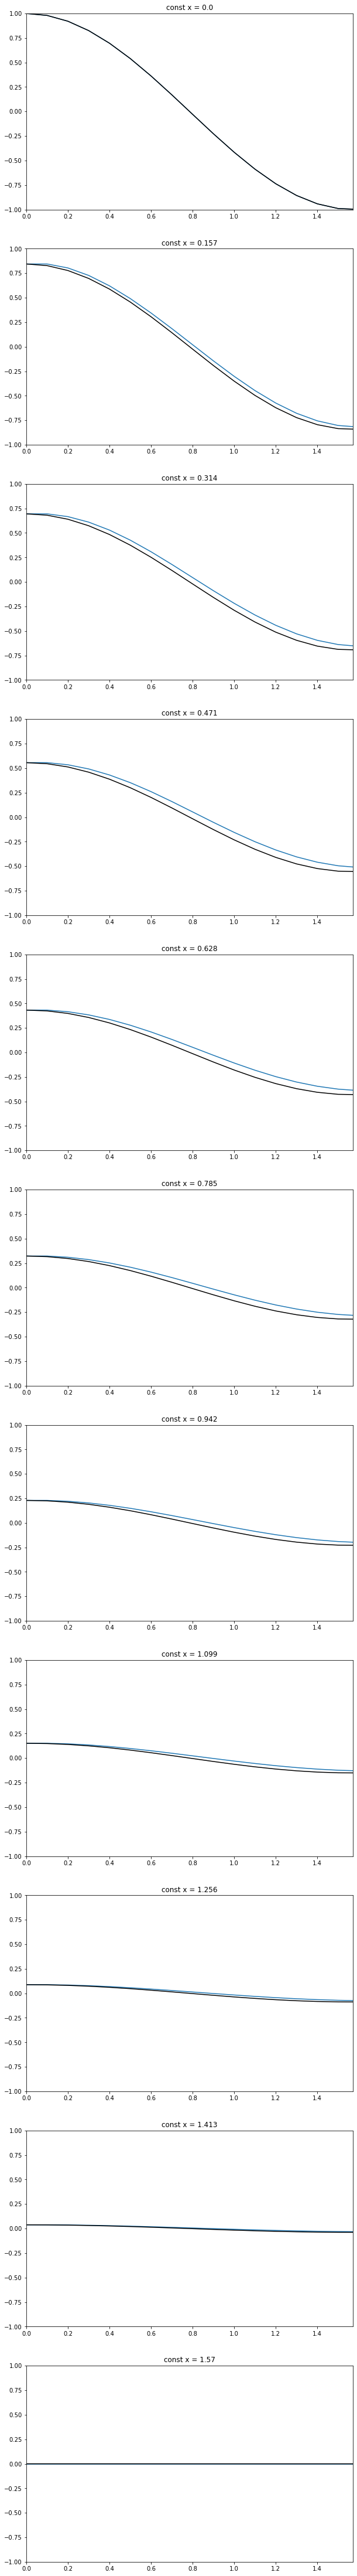

In [24]:
a = HyperboloidSolver(0.1, 0.157, (0, 10), (0, math.pi / 2))
a.implicit()
a.x_const_plot()

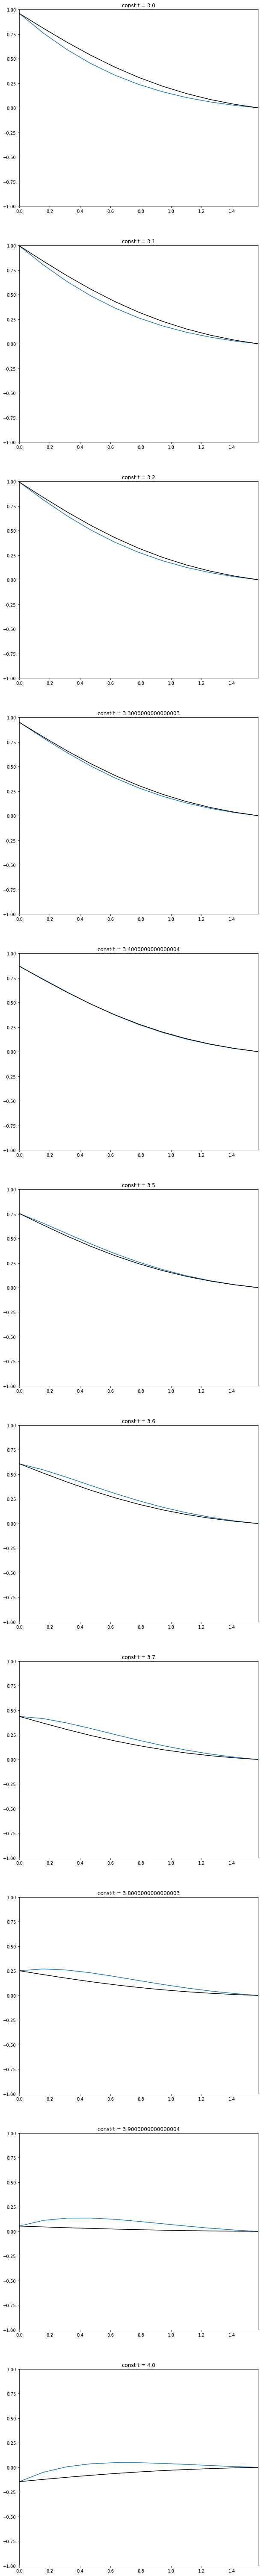

In [25]:
a.t_const_plot((30, 40))

In [26]:
def error_by_r():
    fig = plt.figure(figsize=(9,5))
    r_values = [0.0001 * 8**i for i in range(5)]
    error_values = []
    ax = fig.add_subplot()
    ax.set_title(f"error by r = {r_values}, const h = 0.1")
    ax.set(ylim=[0, 1])
    for i in range(len(r_values)):        
        a = HyperboloidSolver(r_values[i], 0.157, (0, 10), (0, math.pi / 2))
        a.explicit()
        error_values.append(a.get_error())
    print(error_values)
    ax.plot(r_values, error_values)
    
    

[0.10620071233320584, 0.10585341231660893, 0.10350136028639056, 0.0888208424923053, 125868423572799.39]


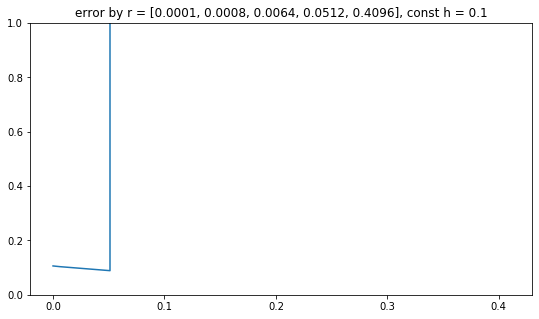

In [27]:
error_by_r()

In [28]:
a.get_error()


0.03997275277545868

In [29]:
def error_by_h():
    fig = plt.figure(figsize=(9,5))
    h_values = [0.1 * 2**i for i in range(3)]
    error_values = []
    ax = fig.add_subplot()
    ax.set_title(f"error by h = {h_values}, const r = 0.1")
    ax.set(ylim=[0, 1])
    for i in range(len(h_values)):        
        a = HyperboloidSolver(0.1, h_values[i], (0, 10), (0, math.pi / 2))
        a.explicit()
        error_values.append(a.get_error())
    print(error_values)
    ax.plot(h_values, error_values)

[4826206004.94425, 0.08770773407700228, 0.04137488750887228]


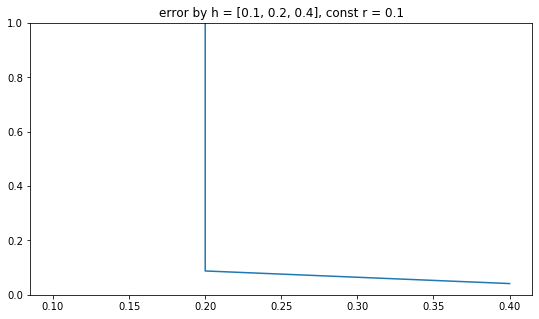

In [30]:
error_by_h()

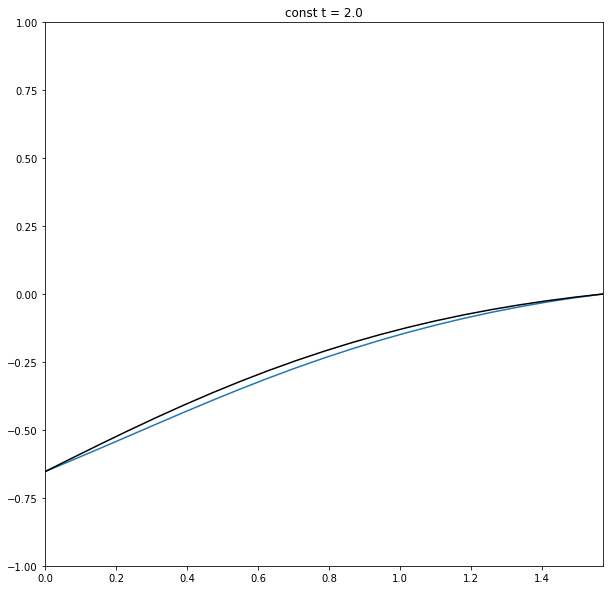

In [37]:
a = HyperboloidSolver(0.01, math.pi / (2 * 20), (0, 10), (0, math.pi / 2))
a.explicit()
a.t_const_plot((200, 200))

In [38]:
print(a.get_error())

0.004107148325786669
